# Classificação com dados desbalanceados

### Carregamento da base de dados

In [1]:
import pandas as pd 
import random
import numpy as np

In [2]:
dataset = pd.read_csv(r'resources\credit_data.csv', sep=',')

In [3]:
dataset.shape

(2000, 5)

In [4]:
dataset.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
dataset.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [6]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

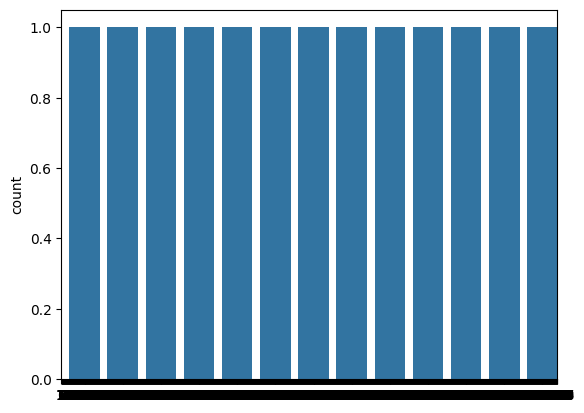

In [7]:
import seaborn as sns 
sns.countplot(dataset['default']);

In [8]:
X = dataset.iloc[:, 1:4].values

In [9]:
X.shape

(1997, 3)

In [10]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [11]:
y = dataset.iloc[:, 4].values

In [12]:
y.shape

(1997,)

In [13]:
y

array([0, 0, 0, ..., 1, 0, 0])

### Base de treinamento e teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size = 0.2, stratify = y)

In [16]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [17]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [18]:
np.unique(y, return_counts=True)
# 0 -> Total de pessoas que pagaram corretamente
# 1 -> Total de pessoas que não pagaram

(array([0, 1]), array([1714,  283]))

In [19]:
1714 / len(dataset), 283 / len(dataset)
# 85% das pessoas pagam corretamente
# 14% das pessoas não pagam

(0.8582874311467201, 0.14171256885327993)

In [20]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [21]:
226 / len(y_treinamento)

0.14151534126487164

In [22]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [23]:
57 / len(y_teste)

0.1425

### Classificação Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [26]:
previsoes = modelo.predict(X_teste)

In [27]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [28]:
y_teste

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_teste, previsoes)

0.92

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[334,   9],
       [ 23,  34]])

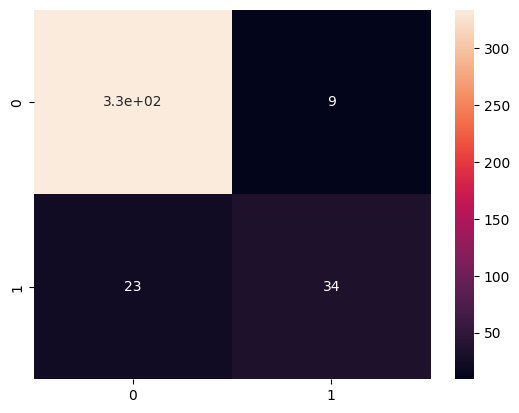

In [43]:
sns.heatmap(cm, annot=True);

In [34]:
(337 + 34 )/ (337 + 23 + 6 + 34)

0.9275

In [35]:
# Percentual de acerto para pessoas que pagam o emprestimo
337 / (337 + 23)

0.9361111111111111

In [36]:
# Percentual de acerto para pessoas que não pagam o emprestimo
34 / (34 + 6)

0.85

### Subamostragem (ubdersampling) - Tomek links

In [41]:
from imblearn.under_sampling import TomekLinks

In [44]:
tl = TomekLinks(sampling_strategy="majority")
X_under, y_under = tl.fit_resample(X,y)

c:\Python\Estatistica Machine Learning\venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Python\Estatistica Machine Learning\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The TomekLinks or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [45]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [46]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [47]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [48]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(
    X_under,
    y_under,
    test_size=0.2,
    stratify=y_under
)

X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [49]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(y_teste_u, previsoes_u)

0.9157894736842105

In [50]:
cm_u = confusion_matrix(y_teste_u, previsoes_u)
cm_u

array([[313,  10],
       [ 22,  35]])

In [51]:
313 / (313 + 10)

0.9690402476780186

In [52]:
31 / (35 + 22)

0.543859649122807

### Sobreamostragem (oversampling) - SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

c:\Python\Estatistica Machine Learning\venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Python\Estatistica Machine Learning\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [56]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [57]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [58]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [62]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(
    X_over,
    y_over,
    test_size=0.2,
    stratify=y_over
)

In [63]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [64]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(y_teste_o, previsoes_o)

0.9110787172011662

In [65]:
cm_o = confusion_matrix(y_teste_o, previsoes_o)
cm_o

array([[296,  47],
       [ 14, 329]])

In [67]:
296 / (296 + 47)

0.8629737609329446

In [68]:
329 / (329 + 14)

0.9591836734693877

In [69]:
# O banco perde: 5000
# Cliente não pagadores: 1000
1000 * 5 / 100

50.0

In [70]:
50 * 5000

250000